## 1. Cities in Sweden - create dataset

In [20]:
import pandas as pd

In [21]:
#Creates a data frame with two columns: Kommun and Population
cities = pd.DataFrame({"Kommun":["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population":[347949, 975551, 233839, 583056]})
print(cities)

      Kommun  Population
0      Malmö      347949
1  Stockholm      975551
2    Uppsala      233839
3   Göteborg      583056


In [22]:
#Prints out all of the cities
print(cities["Kommun"])

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [23]:
#Prints out Göteborg by row index
print(cities.iloc[3])
print()

#Prints out Göteborg by name
print(cities[cities.Kommun == "Göteborg"])

Kommun        Göteborg
Population      583056
Name: 3, dtype: object

     Kommun  Population
3  Göteborg      583056


In [24]:
#Sort the values descending
cities.sort_values(by="Population", ascending=False)

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [25]:
#Saves the three largest cities in a new variable and print it out
largest_cities = cities.sort_values(by="Population", ascending=False).head(3)
print(largest_cities)

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


In [26]:
#Add % of population
cities["Population (%)"] = cities["Population"]/10379295*100
cities

,Kommun,Population,Population (%)
0,Malmö,347949,3.352338
1,Stockholm,975551,9.399010
2,Uppsala,233839,2.252937
3,Göteborg,583056,5.617491


## 2. Cities in Sweden - Real Dataset

In [27]:
cities = pd.read_excel("Filer/komtopp50_2020.xlsx", sheet_name=1)
cities.head(8)
#cities.info
#cities.describe

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401


In [28]:
cities.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
291,54,55.0,Österåker,46644,45574.0,2.34783
292,116,115.0,Östhammar,22251,22250.0,0.004494
293,160,159.0,Östra Göinge,15017,15007.0,0.066636
294,284,284.0,Överkalix,3289,3315.0,-0.784314
295,279,279.0,Övertorneå,4217,4299.0,-1.90742


In [29]:
def clean(datafile):
    datafile = datafile.rename({"Unnamed: 0":"Rang 2020", "Unnamed: 1":"Rang 2019", "Unnamed: 2":"Kommun", "Unnamed: 3":"Folkmängd 2020", "Unnamed: 4":"Folkmängd 2019", "Unnamed: 5":"Förändring"}, axis="columns")
    datafile = datafile.iloc[6:]
    datafile = datafile.reset_index(drop=True)
    return datafile

In [30]:
cities = clean(cities)
cities.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84.0,Ale,31868,31402.0,1.483982
1,64,64.0,Alingsås,41602,41420.0,0.439401
2,123,123.0,Alvesta,20224,20134.0,0.447005
3,255,255.0,Aneby,6821,6848.0,-0.394276
4,169,167.0,Arboga,14039,14087.0,-0.34074


In [31]:
#Sorts the values by Folkmängd 2020
cities.sort_values(by="Folkmängd 2020", ascending=False)

#Saves the five largest cities
largest_cities = cities.sort_values(by="Folkmängd 2020", ascending=False).head()
print(largest_cities)

#Saves the five smallest cities
smallest_cities = cities.sort_values(by="Folkmängd 2020").head()
print(smallest_cities)

#Calculates the sum of all cities for 2019 and 2020
print(f"The total population of the 288 largest cities in Sweden 2019 were: {sum(cities['Folkmängd 2019'])}")
print(f"The total population of the 288 largest cities in Sweden 2020 were: {sum(cities['Folkmängd 2020'])}")

    Rang 2020  Rang 2019     Kommun Folkmängd 2020  Folkmängd 2019 Förändring
198         1        1.0  Stockholm         975551        974073.0   0.151734
57          2        2.0   Göteborg         583056        579281.0    0.65167
134         3        3.0      Malmö         347949        344166.0   1.099179
241         4        4.0    Uppsala         233839        230767.0   1.331213
124         5        5.0  Linköping         164616        163051.0   0.959822
    Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring
12        290      290.0  Bjurholm           2387          2408.0  -0.872093
194       289      289.0   Sorsele           2442          2489.0  -1.888309
29        288      288.0   Dorotea           2498          2551.0  -2.077617
5         287      287.0  Arjeplog           2718          2785.0  -2.405745
271       286      286.0     Åsele           2805          2794.0   0.393701
The total population of the 288 largest cities in Sweden 2019 were: 10

<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

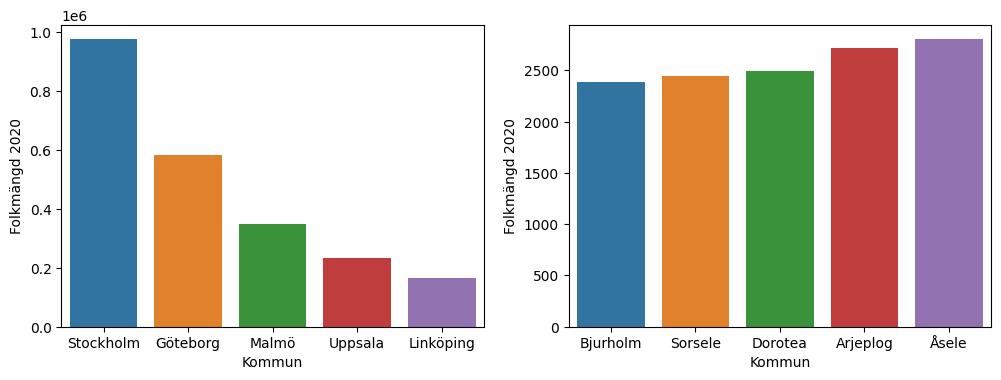

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2, dpi=100, figsize=(12, 4))

sns.barplot(data=largest_cities, x="Kommun", y="Folkmängd 2020", ax=ax[0])
sns.barplot(data=smallest_cities, x="Kommun", y="Folkmängd 2020", ax=ax[1])

## 3. Cities in Sweden - gender

In [33]:
#Cleans the female data
cities_f = pd.read_excel("Filer/komtopp50_2020.xlsx", sheet_name=2)
cities_f = clean(cities_f)

In [37]:
#Cleans the male data
cities_m = pd.read_excel("Filer/komtopp50_2020.xlsx", sheet_name=3)
cities_m = clean(cities_m)
cities_m

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,81,83.0,Ale,16256,16054.0,1.258253
1,64,64.0,Alingsås,20702,20646.0,0.271239
2,122,123.0,Alvesta,10367,10339.0,0.270819
3,255,255.0,Aneby,3503,3498.0,0.142939
4,169,168.0,Arboga,7094,7114.0,-0.281136
...,...,...,...,...,...,...
285,52,55.0,Österåker,23647,23132.0,2.226353
286,115,115.0,Östhammar,11405,11447.0,-0.366908
287,158,156.0,Östra Göinge,7747,7745.0,0.025823
288,284,284.0,Överkalix,1730,1737.0,-0.402994


In [38]:
#Creates a new "Kön"-column and adds the gender to it
cities_f["Kön"] = "Kvinna"
cities_m["Kön"] = "Man"
print(cities_f.head())
print(cities_m.head())

  Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        84       85.0       Ale          15612         15348.0   1.720094   
1        64       64.0  Alingsås          20900         20774.0   0.606527   
2       123      123.0   Alvesta           9857          9795.0   0.632976   
3       255      255.0     Aneby           3318          3350.0  -0.955224   
4       165      164.0    Arboga           6945          6973.0  -0.401549   

      Kön  
0  Kvinna  
1  Kvinna  
2  Kvinna  
3  Kvinna  
4  Kvinna  
  Rang 2020  Rang 2019    Kommun Folkmängd 2020  Folkmängd 2019 Förändring  \
0        81       83.0       Ale          16256         16054.0   1.258253   
1        64       64.0  Alingsås          20702         20646.0   0.271239   
2       122      123.0   Alvesta          10367         10339.0   0.270819   
3       255      255.0     Aneby           3503          3498.0   0.142939   
4       169      168.0    Arboga           7094          7114.0  -0.2

In [43]:
#Merge the data
cities_full = cities_m.append(cities_f, ignore_index=True)
cities_full

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83.0,Ale,16256,16054.0,1.258253,Man
1,64,64.0,Alingsås,20702,20646.0,0.271239,Man
2,122,123.0,Alvesta,10367,10339.0,0.270819,Man
3,255,255.0,Aneby,3503,3498.0,0.142939,Man
4,169,168.0,Arboga,7094,7114.0,-0.281136,Man
...,...,...,...,...,...,...,...
575,55,57.0,Österåker,22997,22442.0,2.473042,Kvinna
576,117,118.0,Östhammar,10846,10803.0,0.398038,Kvinna
577,160,159.0,Östra Göinge,7270,7262.0,0.110162,Kvinna
578,284,284.0,Överkalix,1559,1578.0,-1.204056,Kvinna
